Relay drived by a bipolar transistor
====================================

This example shows the simulation of \...


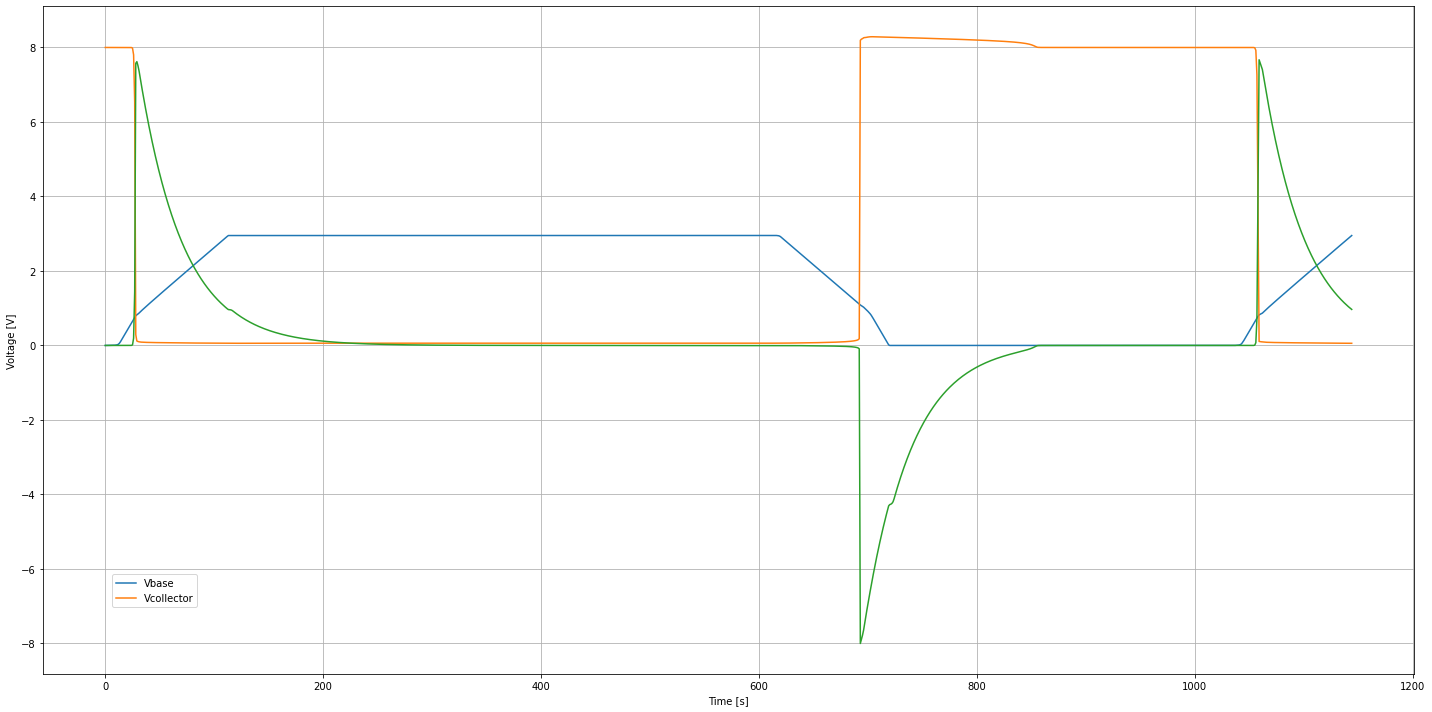

In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)



period = 50@u_ms
pulse_width = period / 2

circuit = Circuit('Relay')

# circuit.V('digital', 'Vdigital', circuit.gnd, 5@u_V)
circuit.PulseVoltageSource('clock', 'clock', circuit.gnd, 0@u_V, 5@u_V, pulse_width, period, rise_time=5@u_ms, fall_time=5@u_ms)
circuit.R('base', 'clock', 'base', 100@u_Ω)
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='bjt') # Q is mapped to BJT !
circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
circuit.V('analog', 'VccAnalog', circuit.gnd, 8@u_V)
circuit.R('relay', 'VccAnalog', 1, 50@u_Ω)
circuit.L('relay', 1, 'collector', 100@u_mH)
circuit.include(spice_library['1N5822']) # Schottky diode
diode = circuit.X('D', '1N5822', 'collector', 'VccAnalog')
# Fixme: subcircuit node
# diode.minus.add_current_probe(circuit)


figure, ax = plt.subplots(figsize=(20, 10))

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=period/1000, end_time=period*1.1)

ax.set_title('')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis.base)
ax.plot(analysis.collector)
# Fixme: current probe
# ax.plot((analysis['1'] - analysis.collector)/circuit.Rrelay.resistance)
ax.plot(analysis['1'] - analysis.collector)
ax.legend(('Vbase', 'Vcollector'), loc=(.05,.1))

plt.tight_layout()

